In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
z1 = 10000
f = 100
w = 2*np.pi*f
c = 100e-6
for f in range(100,3000,100):
    w = 2*np.pi*f
    z2 = 1/(w*c)
    z = 1/(1/z1 + 1/z2)
    #print(z)
    #print(z2)

In [32]:
rp = 27e3
rd1 = 1e3
rd2 = 2e3

cv1 = 2200e-9
cp1 = 2.2e-9

cv2 = 100e-9
cp2 = 33e-9

rg1 = rd1+rp
rg2 = rd2+rp
print(f"rg1 = {rg1}, rg2 = {rg2}")

rd01 = (rd1*rp)/(rd1+rp)
rd02 = (rd2*rp)/(rd2+rp)
print(f"rd01 = {rd01}, rd02 = {rd02}")

f1 = 1/(2*np.pi * cv1 * rg1)
f2 = 1/(2*np.pi * cp1 * rd01)
print(f"f1 = {f1}, f2 = {f2}")

f1 = 1/(2*np.pi * cv2 * rg2)
f2 = 1/(2*np.pi * cp2 * rd02)
print(f"f1 = {f1}, f2 = {f2}")

rg1 = 28000.0, rg2 = 29000.0
rd01 = 964.2857142857143, rd02 = 1862.0689655172414
f1 = 2.583684141102197, f2 = 75022.53209718973
f1 = 54.88101485927425, f2 = 2590.0636081172647


# Frekventna karakteristika RC pojačala s MOSFET-om

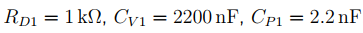

In [44]:
Rd1 = 1 * 1e3
Cv1 = 2200 * 1e-9
Cp1 = 2.2 * 1e-9
vul = 0.1
viz = 0.15
Rp = 27 * 1e3
Rd0 = 1/(1/Rd1 + 1/Rp)
R_G = 39 * 1e3
Rg0 = Rd1 + Rp
A0 = viz/vul

f = np.array([15.14,15.65,17.3,20.76,25.8,32,66.6,200,1230,3230,15700,32000,58100,71140,83670,96420])
viz = np.array([0.1,0.105,0.11,0.125,0.13,0.14,0.15,0.15,0.15,0.15,0.15,0.14,0.12,0.11,0.1,0.09])
A = viz/vul
data = {"f": f, "v2": viz, "A": A}

print(Rp,Rg0)

27000.0 28000.0


In [45]:
df = pd.DataFrame(data, columns = ["f","v2","A"], 
                  index = range(1,len(data["f"])+1))
#df

In [46]:
#df

In [47]:
#f1 = 1/(2*np.pi*Cv1*Rp)
f1 = 1/(2*np.pi*Cv1*Rg0) 
f2 = 1/((2*np.pi*Cp1*Rd0))
print(f"f1 = {f1:.3},f2 = {f2:.3}")
f1 = 17.3
f2 = 71140.
print(f"f1 = {f1:.3},f2 = {f2:.3}")


fl = lambda x: 1/(np.sqrt(1+(f1/x)**2))
fh = lambda x: 1/(np.sqrt(1+(x/f2)**2))
f = lambda x: np.sqrt(fl(x)*fh(x)*A0**2)

xs = np.linspace(0,10**6,10**5+1)

xs1 = np.linspace(1,900,10**5+1)
xs2 = np.linspace(900,20000,10**5+1)
ys1 = fl(xs1)*A0
ys2 = fh(xs2)*A0
ys = f(xs)

f1 = 2.58,f2 = 7.5e+04
f1 = 17.3,f2 = 7.11e+04


<ipython-input-47-b2b37ad270dc>:10: RuntimeWarning: divide by zero encountered in true_divide
  fl = lambda x: 1/(np.sqrt(1+(f1/x)**2))


<ipython-input-50-21daca8a874c>:9: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  p1.set_xlim(0,10**5+10**4)


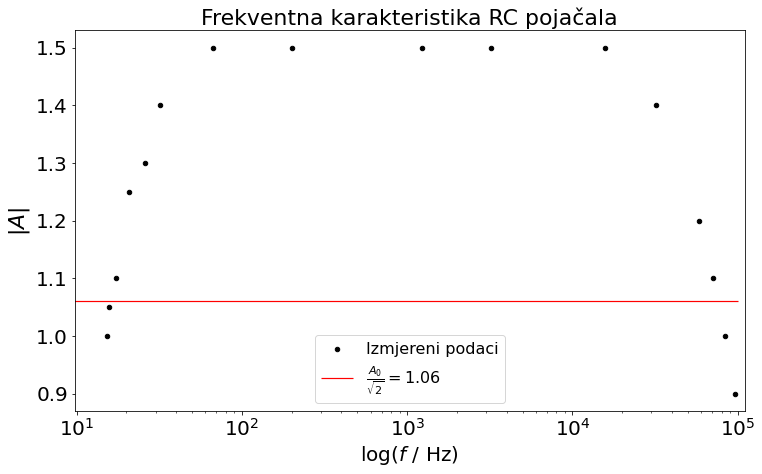

In [50]:
from pylab import rcParams
rcParams['figure.figsize'] = (12, 7)
p1 = df.plot.scatter(x = "f", y = "A", color = "black", label="Izmjereni podaci")
p1.set_title("Frekventna karakteristika RC pojačala", fontsize=22)
p1.set_xscale("log")
p1.hlines(A0/np.sqrt(2), 0, 1e5, color = "red", linewidth = 1.2, label=r"$\frac{A_0}{\sqrt{2}} = 1.06$")
#p1.hlines(A0/np.sqrt(2), 0, 1e7, color = "red", linewidth = 1.2, 
          #label=(r"$\dfrac{A_0}{\sqrt{2}}=$ " + str(round(A0/np.sqrt(2),3))))
p1.set_xlim(0,10**5+10**4)
#p1.set_ylim(0,1.6)
p1.set_xlabel("$\log{(f \ / \ \mathrm{Hz})}$", size=20)
#p1.set_xlabel("$f \ / \ \mathrm{Hz}$", size=22)
p1.set_ylabel(r"$|A|$", size=22)
#p1.tick_params(axis="x", labelsize=16, width=2, length=8)
#p1.tick_params(axis="y", labelsize=16, width=2, length=8)

#plt.scatter([f1,f2],[f(f1), f(f2)], color="red")
#plt.scatter([17.3,71140],[1.1, 1.1], color="red")

#plt.scatter(1600,7, color="red")
#plt.scatter(900,A0/np.sqrt(2),color="red")
p1.tick_params(axis='both', which='major', labelsize=20)

#plt.plot(xs1,ys1, linestyle="--", color="black", label="Ekstrapolacija podataka")
#plt.plot(xs2,ys2, linestyle="--", color="black", label="Ekstrapolacija podataka")
#plt.plot(xs,ys, linestyle="--", color="black", label="Ekstrapolacija podataka")
p1.legend(fontsize=16)
p1.get_figure().savefig("frek_RC1.png")

# Frekventna karakteristika RC pojačala s MOSFET-om

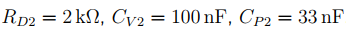

In [38]:
Rd2 = 2 * 1e3
Cv2 = 100 * 1e-9
Cp2 = 33 * 1e-9
vul2 = 0.1
viz2 = 0.26
Rp = 27 * 1e3
Rd0 = 1/(1/Rd2 + 1/Rp)
R_G = 39 * 1e3
Rg0 = Rd2 + Rp
A0 = viz2/vul2

f = np.array([18,21.7,34.4,38.4,46.5,56.7,77,108.7,204.8,322,857,943,1420,2020,2770,4200,4820,7500,8770,18700])
viz = np.array([0.08,0.1,0.15,0.16,0.18,0.2,0.22,0.24,0.26,0.26,0.26,0.26,0.24,0.22,0.2,0.18,0.16,0.12,0.1,0.05])
A = viz/vul2
data = {"f": f, "v2": viz, "A": A}
len(viz)

20

In [39]:
df = pd.DataFrame(data, columns = ["f","v2","A"], 
                  index = range(1,len(data["f"])+1))

In [40]:
#df

In [41]:
#1 = 1/(2*np.pi*Cv1*Rp)
f1 = 1/(2*np.pi*Cv2*Rg0)
f2 = 1/((2*np.pi*Cp2*Rd0))
print(f"f1 = {f1:.3},f2 = {f2:.3}")
f1 = 46.5
f2 = 4200.
print(f"f1 = {f1:.3},f2 = {f2:.3}")


fl = lambda x: 1/(np.sqrt(1+(f1/x)**2))
fh = lambda x: 1/(np.sqrt(1+(x/f2)**2))
f = lambda x: np.sqrt(fl(x)*fh(x)*A0**2)
#f = lambda x: (fl(x)*A0+fh(x)*A0)/2

xs = np.linspace(0,20000,10**5+1)

xs1 = np.linspace(1,900,10**5+1)
xs2 = np.linspace(900,20000,10**5+1)
ys1 = fl(xs1)*A0
ys2 = fh(xs2)*A0
ys = f(xs)
A0/np.sqrt(2)

f1 = 54.9,f2 = 2.59e+03
f1 = 46.5,f2 = 4.2e+03


<ipython-input-41-741e8bb9a8bf>:10: RuntimeWarning: divide by zero encountered in true_divide
  fl = lambda x: 1/(np.sqrt(1+(f1/x)**2))


1.8384776310850235

<ipython-input-43-387e52bb5418>:9: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  p1.set_xlim(0,20000)


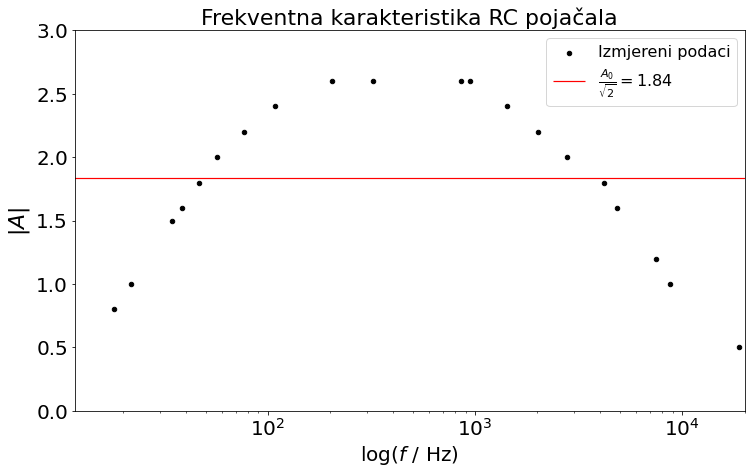

In [43]:
from pylab import rcParams
rcParams['figure.figsize'] = (12, 7)
p1 = df.plot.scatter(x = "f", y = "A", color = "black", label="Izmjereni podaci")
p1.set_title("Frekventna karakteristika RC pojačala", fontsize=22)
p1.set_xscale("log")
p1.hlines(A0/np.sqrt(2), 0, 1e5, color = "red", linewidth = 1.2, label=r"$\frac{A_0}{\sqrt{2}} = 1.84$")
#p1.hlines(A0/np.sqrt(2), 0, 1e7, color = "red", linewidth = 1.2, 
          #label=(r"$\dfrac{A_0}{\sqrt{2}}=$ " + str(round(A0/np.sqrt(2),3))))
p1.set_xlim(0,20000)
p1.set_ylim(0,3)
p1.set_xlabel("$\log{(f \ / \ \mathrm{Hz})}$", size=20)
#p1.set_xlabel("$f \ / \ \mathrm{Hz}$", size=22)
p1.set_ylabel(r"$|A|$", size=22)
#p1.tick_params(axis="x", labelsize=16, width=2, length=8)
#p1.tick_params(axis="y", labelsize=16, width=2, length=8)

#plt.scatter([f1,f2],[f(f1), f(f2)], color="red")
#plt.scatter([46.5,4200],[1.8, 1.8], color="red")

#plt.scatter(1600,7, color="red")
#plt.scatter(900,A0/np.sqrt(2),color="red")
p1.tick_params(axis='both', which='major', labelsize=20)

#plt.plot(xs1,ys1, linestyle="--", color="black", label="Ekstrapolacija podataka")
#plt.plot(xs2,ys2, linestyle="--", color="black", label="Ekstrapolacija podataka")
#plt.plot(xs,ys, linestyle="--", color="black", label="Ekstrapolacija podataka")
p1.legend(fontsize=16)
p1.get_figure().savefig("frek_RC2.png")

# Pojačanje u srednjem frekventnom području



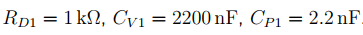

In [397]:
#izmjereno
vul = 20 * 1e-3
viz = 0.52
A0 = viz/vul
print(f"A0 = {A0:.3}")

A0 = 26.0


### Prije:
$|A_0| = 1.5$

 
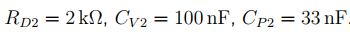

In [398]:
#izmjereno
vul = 48 * 1e-3
viz = 1
A0 = viz/vul
print(f"A0 = {A0:.3}")

A0 = 20.8


In [399]:
#izmjereno
vul = 32 * 1e-3
viz = 0.7
A0 = viz/vul
print(f"A0 = {A0:.3}")

A0 = 21.9


### Prije:
$|A_0| = 2.6$